# Data understanding

We will analyze the *titanic* dataset:

* to realize what information we have (statistical units, variables)
* to check data quality and reliability of data
* to understand distributions of variables and their relationships
* to suggest steps for data cleaning
* to suggest useful data transformations

## 0. What is our goal?

Analysis of date comes out from the goal of the **business understanding**. So first we set that goal:

> We analyse Titanic data to find out how survival for each passenger can be predicted from his or her attributes.

Let's start with loading data and making a quick overview.

In [19]:
### Setup
%matplotlib inline
%load_ext pretty_jupyter

# should enable plotting without explicit call .show()

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# classes for special types
from pandas.api.types import CategoricalDtype

# Apply the default theme
sns.set_theme()

# Reading and inspecting data
df = pd.read_csv("titanic_train.csv")
df

The pretty_jupyter extension is already loaded. To reload it, use:
  %reload_ext pretty_jupyter


,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


## 1. Basic overview of the data

1. Rows: How many? What are statistical units? How can a unit be identified?
2. Columns: How many? What are their names, types, meanings? At the first glance, do values seem plausible? Are all of them useful for our purpose?

Summary: do we need to carry out any initial transformations? (i. e. to make a sample of rows or columns; to convert column names to lowercase; to provide a column with ID; to remove some columns etc.)

In [20]:
print(df.shape)
print(df.dtypes)

(850, 15)
passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object


## 2. Checking the data quality

* Are there any duplicated rows (with exclusion of ID)?
* What are counts and shares of missing values in the dataset columns?
* Are counts of missing values expectable and acceptable?
* Are any columns or rows (almost) empty and may be removed as useless?
* In which columns should we consider fixing of values (correction, filling)?

In [21]:
df.count(axis=1).value_counts()

12    265
11    189
13    169
14    121
10    106
dtype: int64

After all these check we can do a summary about data quality and make recommendations for preprocessing (cleaning, fixing) data. Some of them can be done immediately if it is necessary or may be useful for the analysis.

## 3. Checking variable distributions

It's a good idea to start with the most important variables: the target one (*survived*) and the ones we expect to provide great information for the target one while being complete (*sex*, *pclass*, *fare*, *embarked*). Then we go to variables which are more complicated or need a fixing (*age*).

For each of those six variables above, try to do following:

* Make descriptive statistics of the distribution and a proper graph.
* Consider if the distribution is expectable and seems plausible (no strange or obviously invalid values).
* If the variable has missing values, try to figure out reasons of it and to suggest a fixing, if necessary.

## 4. Analysis of relationships

The last part of this practice section is to analyze relationship between variables. Check how is *survival* related to each of five remaining variables considered in the previous part (*sex*, *pclass*, *fare*, *embarked*, *age*).

## Lorem ipsum section
### This is some useless heading
#### Lorem ipsum
Lorem `ipsum` dolor sit amet, consectetuer adipiscing elit. `Aliquam erat volutpat.` Ut **enim** ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Praesent dapibus. Nullam dapibus fermentum ipsum. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien. Nullam sapien sem, ornare ac, nonummy non, lobortis a enim. Nunc auctor. Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Integer vulputate sem a nibh rutrum consequat. Donec quis nibh at felis congue commodo. Donec ipsum massa, ullamcorper in, auctor et, scelerisque sed, est. Suspendisse sagittis ultrices augue. Proin mattis lacinia justo. Proin pede metus, vulputate nec, fermentum fringilla, vehicula vitae, justo. Fusce aliquam vestibulum ipsum.


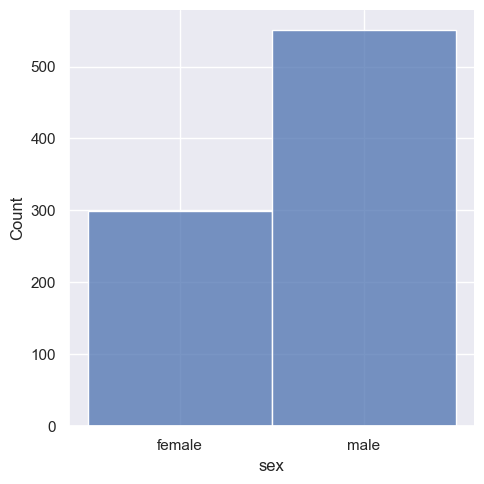

In [22]:
g = sns.displot(data=df, x="sex")

## Another heading
Lorem `ipsum` dolor sit amet, consectetuer adipiscing elit. `Aliquam erat volutpat.` Ut **enim** ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Praesent dapibus. Nullam dapibus fermentum ipsum. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien. Nullam sapien sem, ornare ac, nonummy non, lobortis a enim. Nunc auctor. Lorem 

## Tabset here
[//]: # (-.- tabset)

### Tab 1
111111111111111111111111111111111111111111111111

### Tab 2
222222222222222222222222222222222222222222222222

In [23]:
%%jmd
## Dynamic text
Dataset shape is: {{ df.shape }}

## Dynamic text
Dataset shape is: (850, 15)

## Pandas profiling

In [28]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_profile = ProfileReport(titanic_train, title="Titanic Profiling Report")
titanic_profile.to_file("my_titanic_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\pandas_profiling\model\correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(
c:\Users\vojta\UK\22-23_W\data-science\NDBI048-data-science\.venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it w

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

See the generated report [here](./my_titanic_report.html)